
================ FULL DATASET ================
Accuracy: 0.8848
AUC:      0.7463

================ 20% SMALL DATASET ================
Accuracy: 0.8842
AUC:      0.7421


================ FINAL COMPARISON ================
Metric     |       Full |      Small
----------------------------------------
Accuracy   | 0.8848 | 0.8842
AUC             | 0.7463 | 0.7421


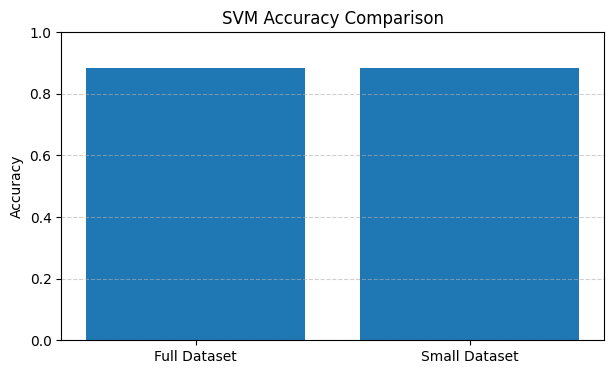

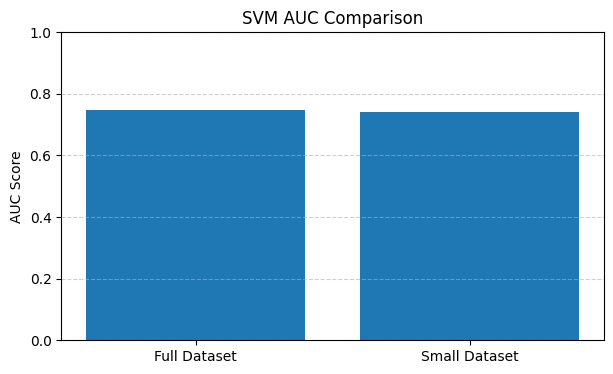


Graphs generated successfully!


In [ ]:
#SVM COMPARISON: FULL vs SMALL DATASET

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Load datasets
full = pd.read_csv("train_preprocessed.csv")
small = pd.read_csv("train_small.csv")

TARGET = "RiskFlag"
IDCOL = "ProfileID"

# Drop ID column
full = full.drop(columns=[IDCOL])
small = small.drop(columns=[IDCOL])


# Function: Train SVM & return Accuracy + AUC
def train_svm(df, label="DATASET"):
    print(f"\n================ {label} ================")

    X = df.drop(columns=[TARGET])
    y = df[TARGET].astype(int)

    # Train-validation split
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.20, stratify=y, random_state=42
    )

    # Linear SVM with probability calibration
    base_svm = LinearSVC(C=1.0, max_iter=5000, dual=False)
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svm", CalibratedClassifierCV(base_svm, cv=3, method="sigmoid"))
    ])

    # Fit model
    model.fit(X_train, y_train)

    # Predictions
    preds_prob = model.predict_proba(X_val)[:, 1]
    preds = (preds_prob >= 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_val, preds)
    auc = roc_auc_score(y_val, preds_prob)

    print(f"Accuracy: {acc:.4f}")
    print(f"AUC:      {auc:.4f}")

    return acc, auc


# Run SVM on FULL and SMALL
full_acc, full_auc = train_svm(full, "FULL DATASET")
small_acc, small_auc = train_svm(small, "20% SMALL DATASET")

# Comparison Summary
print("\n\n================ FINAL COMPARISON ================")
print(f"{'Metric':10s} | {'Full':>10s} | {'Small':>10s}")
print("-" * 40)
print(f"{'Accuracy':10s} | {full_acc:.4f} | {small_acc:.4f}")
print(f"{'AUC':10s}      | {full_auc:.4f} | {small_auc:.4f}")


# GRAPH GENERATION

# ---- Bar chart: Accuracy ----
plt.figure(figsize=(7, 4))
plt.bar(["Full Dataset", "Small Dataset"], [full_acc, small_acc])
plt.title("SVM Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# ---- Bar chart: AUC ----
plt.figure(figsize=(7, 4))
plt.bar(["Full Dataset", "Small Dataset"], [full_auc, small_auc])
plt.title("SVM AUC Comparison")
plt.ylabel("AUC Score")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

print("\nGraphs generated successfully!")
